## **Import Libraries**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 1662574418893344.csv to 1662574418893344.csv


In [83]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [124]:
raw_data = pd.read_csv('1662574418893344.csv')

In [241]:
df= raw_data.copy()
df.head()

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."


## **Data Cleaning**

In [242]:
df.isnull().sum()

,0
Food_ID,0
Name,0
C_Type,0
Veg_Non,0
Describe,0


In [243]:
df.duplicated().sum()

0

## **Data Transformation**

In [244]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalAveragePooling1D, Dropout
from tensorflow.keras.optimizers import Adam



## **Text Preprocessing**

In [245]:

vocab_size = 1000
embedding_dim = 64
max_length = 30
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"


In [246]:

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(df['Describe'])
word_index = tokenizer.word_index

In [247]:
sequences = tokenizer.texts_to_sequences(df['Describe'])
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [248]:
category_labels = pd.get_dummies(df['C_Type'])


In [249]:
labels = category_labels.values


## **Model Building**

In [250]:
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(64)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(category_labels.shape[1], activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [251]:
optimizer = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


## **Model Fitting**

In [252]:
history = model.fit(padded, labels, epochs=30, batch_size=16, validation_split=0.2, verbose=2)


Epoch 1/30
20/20 - 10s - 497ms/step - accuracy: 0.1688 - loss: 2.7289 - val_accuracy: 0.0250 - val_loss: 2.9268
Epoch 2/30
20/20 - 1s - 72ms/step - accuracy: 0.2000 - loss: 2.4562 - val_accuracy: 0.1250 - val_loss: 3.2030
Epoch 3/30
20/20 - 3s - 127ms/step - accuracy: 0.2438 - loss: 2.3195 - val_accuracy: 0.1250 - val_loss: 3.3319
Epoch 4/30
20/20 - 3s - 126ms/step - accuracy: 0.2375 - loss: 2.2205 - val_accuracy: 0.0375 - val_loss: 3.6780
Epoch 5/30
20/20 - 3s - 129ms/step - accuracy: 0.2812 - loss: 2.0704 - val_accuracy: 0.0500 - val_loss: 3.6264
Epoch 6/30
20/20 - 3s - 172ms/step - accuracy: 0.3031 - loss: 1.9123 - val_accuracy: 0.1000 - val_loss: 3.6355
Epoch 7/30
20/20 - 2s - 81ms/step - accuracy: 0.4000 - loss: 1.7606 - val_accuracy: 0.1125 - val_loss: 3.4811
Epoch 8/30
20/20 - 1s - 72ms/step - accuracy: 0.4469 - loss: 1.5743 - val_accuracy: 0.1250 - val_loss: 3.5081
Epoch 9/30
20/20 - 3s - 130ms/step - accuracy: 0.4781 - loss: 1.4787 - val_accuracy: 0.1375 - val_loss: 3.8912
Epo

In [254]:
def recommend_recipe(description):
    sequence = tokenizer.texts_to_sequences([description])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)

    prediction = model.predict(padded_sequence)
    category = category_labels.columns[np.argmax(prediction)]
    return f"Recommended Category: {category}"

In [255]:
sample_description = "olive oil, garlic, chicken, tomato sauce"
print(recommend_recipe(sample_description))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Recommended Category: Healthy Food


In [256]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

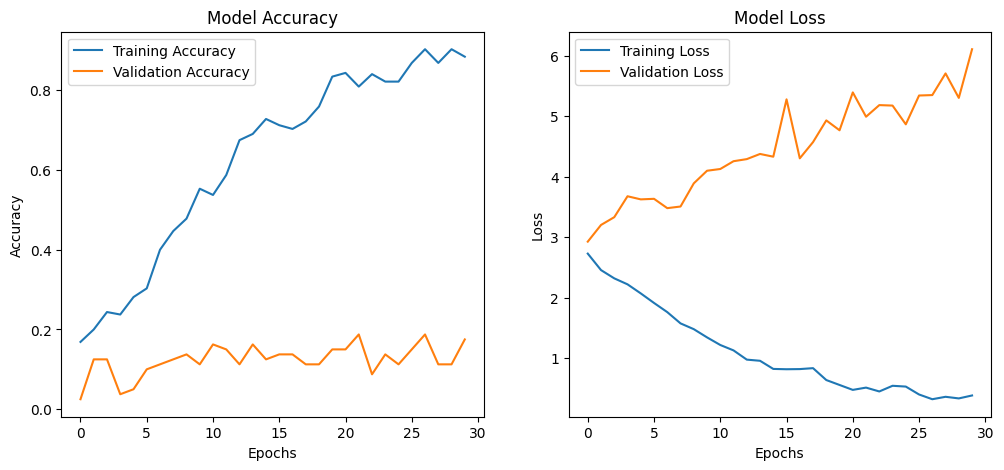

In [257]:
plot_history(history)


In [258]:
0

0